# Example: 2D data analyzer

Shenyao Jin, shenyaojin@mines.edu

The submodule `fiberis.analyzer.Data2D` is designed to analyze 2D discrete time series data, here is the example how it can read, write and process those kind of data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

from fiberis.analyzer.Data2D.core2D import Data2D
import datetime

# Data I/O
## Load data
`Data2D` is able to read the formatted npz data file easily using `load_npz` method. In this case, let first load some `HFTS2` data.

In [2]:
from fiberis.io.reader_hfts2_h5 import HFTS2DAS2D
dataio = HFTS2DAS2D()
dataio.read("../../data/2d/original_data")

Merged file 1/9: sensor_2019-03-28T160419Z.h5
Merged file 2/9: sensor_2019-03-28T160919Z.h5
Merged file 3/9: sensor_2019-03-28T161419Z.h5
Merged file 4/9: sensor_2019-03-28T161919Z.h5
Merged file 5/9: sensor_2019-03-28T162419Z.h5
Merged file 6/9: sensor_2019-03-28T162919Z.h5
Merged file 7/9: sensor_2019-03-28T163436Z.h5
Merged file 8/9: sensor_2019-03-28T163936Z.h5
Merged file 9/9: sensor_2019-03-28T164436Z.h5
Finished reading and merging all files.


In [3]:
# Load daxis, for original data does not have one.
from fiberis.utils.io_utils import load_hfts2_depthtable
md = load_hfts2_depthtable("../../data/2d/original_data/All_DAS_fibre_depth_table.csvh")

In [4]:
dataio.daxis = md
DASdata = Data2D()
DASdata = dataio.to_analyzer()

In [5]:
print(DASdata)

--- Data2D Object Summary: HFTS2 Merged Data ---
Name: HFTS2 Merged Data
Start Time: 2019-03-28T16:04:19.700000+00:00
Data Shape: (6100, 258)
Time Axis (taxis): Length=258
  Values (first 10): [ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]...
Depth Axis (daxis): Length=6100
  Values (first 10): [-318.93235  -317.911398 -316.890445 -315.869493 -314.848541 -313.827588
 -312.806636 -311.785684 -310.764731 -309.743779]...
History contains 10 records.
----------------------------------------------------


## Write data
`Data2D` provides `savez` method to write a complete `Data2D` object to a npz file. So in the future we can load large amount data without `h5` I/O.

In [9]:
# Save this dataset to npz for analyze in the future.
# DASdata.savez("../../data/2d/fiberis_format/DASdata_example.npz")
# to load the data, just use
# DASdata.load_npz("../../data/2d/fiberis_format/DASdata_example.npz")

## Merge data

`Data2D` provides a method to merge two DAS datasets, no matter they are continous or not (only need they are not overlapping with each other).

In [6]:
DASdata_right = DASdata.copy()
DASdata_right.shift(DASdata.taxis[-1])
DASdata.right_merge(DASdata_right) # Here I merged two same DASdatasets.

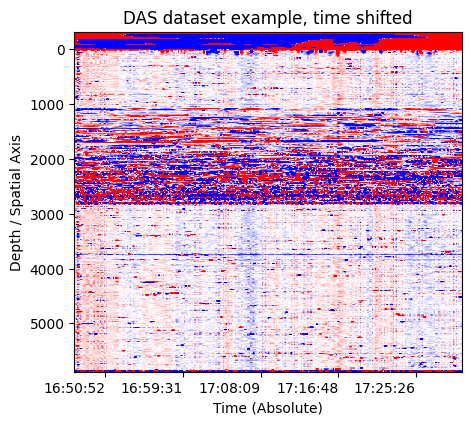

In [7]:
# Plot, original data and merged data
# For memory consideration, all operation will change the dataframe itself!
fig, ax = plt.subplots(figsize=(5,5))
im = DASdata_right.plot(ax=ax, cmap='bwr', use_timestamp=True)
im.set_clim(-1000, 1000)
plt.title("DAS dataset example, time shifted")
plt.show()

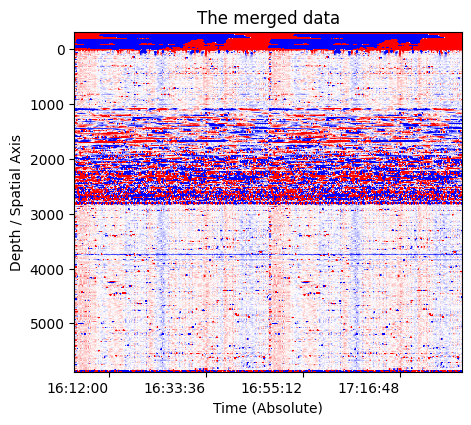

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
im = DASdata.plot(ax=ax, cmap='bwr', use_timestamp=True)
im.set_clim(-1000, 1000)
plt.title("The merged data")
plt.show()

In [9]:
# Rename the object
DASdata.rename("Merged data")

# Info system
The info system of `Data2D` is very important to keep your research reproducible and reliable. It will record every single operation you did while you call the functions implemented by me. Here is a showcase of the INFO system.

In [10]:
# Print info
DASdata.history.print_records()

[INFO] 2025-10-02 14:35:44.389: Initialized Data2D object with name: sensor_2019-03-28T160419Z.h5
[INFO] 2025-10-02 14:35:44.389: Name changed from 'sensor_2019-03-28T160419Z.h5' to 'HFTS2 Merged Data'.
[INFO] 2025-10-02 14:35:44.396: Successfully merged with 'sensor_2019-03-28T160919Z.h5'. New time axis length: 60
[INFO] 2025-10-02 14:35:44.403: Successfully merged with 'sensor_2019-03-28T161419Z.h5'. New time axis length: 90
[INFO] 2025-10-02 14:35:44.409: Successfully merged with 'sensor_2019-03-28T161919Z.h5'. New time axis length: 120
[INFO] 2025-10-02 14:35:44.416: Successfully merged with 'sensor_2019-03-28T162419Z.h5'. New time axis length: 150
[INFO] 2025-10-02 14:35:44.423: Successfully merged with 'sensor_2019-03-28T162919Z.h5'. New time axis length: 180
[INFO] 2025-10-02 14:35:44.431: Successfully merged with 'sensor_2019-03-28T163436Z.h5'. New time axis length: 210
[INFO] 2025-10-02 14:35:44.439: Successfully merged with 'sensor_2019-03-28T163936Z.h5'. New time axis length

In [11]:
DASdata.history.add_record("Test record", level='INFO')

In [12]:
example_filter = lambda record: record.get('level') in ['INFO']
DASdata.history.get_records(example_filter)

[{'description': 'Initialized Data2D object with name: sensor_2019-03-28T160419Z.h5',
  'timestamp': datetime.datetime(2025, 10, 2, 14, 35, 44, 389892),
  'level': 'INFO'},
 {'description': "Name changed from 'sensor_2019-03-28T160419Z.h5' to 'HFTS2 Merged Data'.",
  'timestamp': datetime.datetime(2025, 10, 2, 14, 35, 44, 389916),
  'level': 'INFO'},
 {'description': "Successfully merged with 'sensor_2019-03-28T160919Z.h5'. New time axis length: 60",
  'timestamp': datetime.datetime(2025, 10, 2, 14, 35, 44, 396662),
  'level': 'INFO'},
 {'description': "Successfully merged with 'sensor_2019-03-28T161419Z.h5'. New time axis length: 90",
  'timestamp': datetime.datetime(2025, 10, 2, 14, 35, 44, 403196),
  'level': 'INFO'},
 {'description': "Successfully merged with 'sensor_2019-03-28T161919Z.h5'. New time axis length: 120",
  'timestamp': datetime.datetime(2025, 10, 2, 14, 35, 44, 409722),
  'level': 'INFO'},
 {'description': "Successfully merged with 'sensor_2019-03-28T162419Z.h5'. New 

# Data processing methods
`Data2D` provides multiple functions to handle the data.

## Select_time
Crop data along the time axis. Modifies data, taxis, and start_time in place. The taxis will be adjusted to start from 0 relative to the new start_time.

In [13]:
end_time = DASdata.get_end_time()
end_time = end_time - datetime.timedelta(minutes=10)
DASdata_cropped = DASdata.copy()
DASdata_cropped.select_time(DASdata.start_time, end_time)

In [14]:
# OR you can use sec number to crop the data.
DASdata_cropped_sec = DASdata.copy()
DASdata_cropped_sec.select_time(0, DASdata.taxis[-1] - 600)

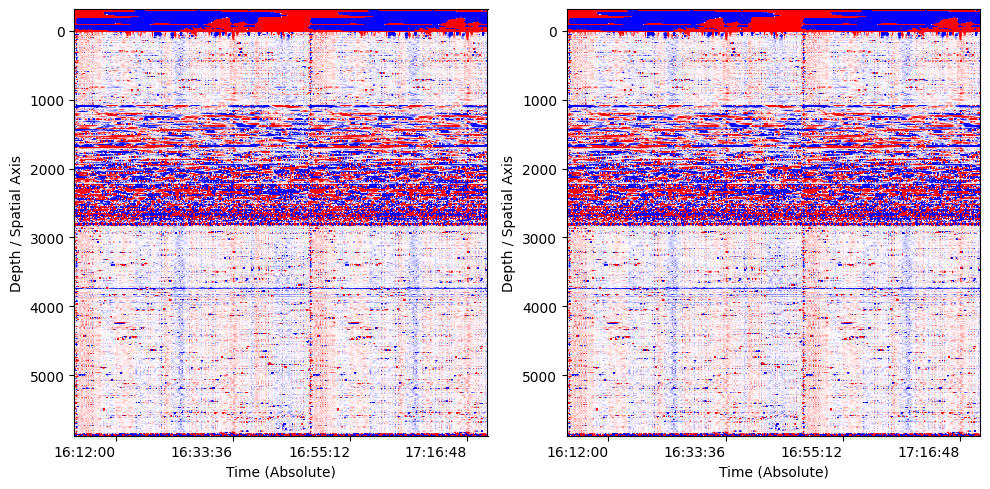

In [21]:
# Plot them for comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = DASdata_cropped.plot(ax=axs[0], cmap='bwr', use_timestamp=True)
im2 = DASdata_cropped_sec.plot(ax=axs[1], cmap='bwr', use_timestamp=True)
im1.set_clim([-1000, 1000])
im2.set_clim([-1000, 1000])
plt.tight_layout()
plt.show()

**Left**: crop time with `datetime` timestamp.

**Right**: crop time with second number.

## Select depth
Crop data along the depth axis. Modifies data and daxis in place.

> Note: This does not normalize daxis to start from 0.

In [22]:
DASdata_cropped = DASdata.copy()
DASdata_cropped.select_depth(5000, 10000)

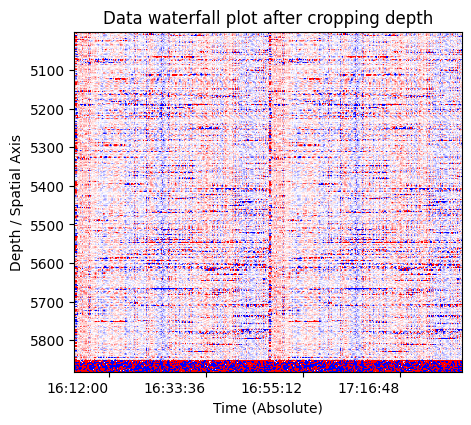

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
im = DASdata_cropped.plot(ax=ax, cmap='bwr', use_timestamp=True)
im.set_clim(-1000, 1000)
plt.title("Data waterfall plot after cropping depth")
plt.show()

## Shift start time
Apply a time shift to the data by adjusting start_time.

In [24]:
DASdata_shift = DASdata.copy()
print("DAS data start time (Original): ", DASdata_shift.start_time)
DASdata_shift.shift(3600)
print("DAS data start time (Shift by 3600 seconds): ", DASdata_shift.start_time)
DASdata_shift.shift(-0.1)
print("DAS data start time (Left shift by 0.1s): ", DASdata_shift.start_time)
DASdata_shift.shift(datetime.timedelta(seconds=0.1))
print("DAS data start time (Right shift by 0.1s): ", DASdata_shift.start_time)

DAS data start time (Original):  2019-03-28 16:04:19.700000+00:00
DAS data start time (Shift by 3600 seconds):  2019-03-28 17:04:19.700000+00:00
DAS data start time (Left shift by 0.1s):  2019-03-28 17:04:19.600000+00:00
DAS data start time (Right shift by 0.1s):  2019-03-28 17:04:19.700000+00:00


TBD

In [ ]:
# TBD.